# **카프카(Kafka)란?**

카프카는 분산 데이터 스트리밍 플랫폼이다.

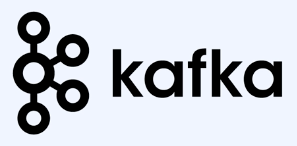

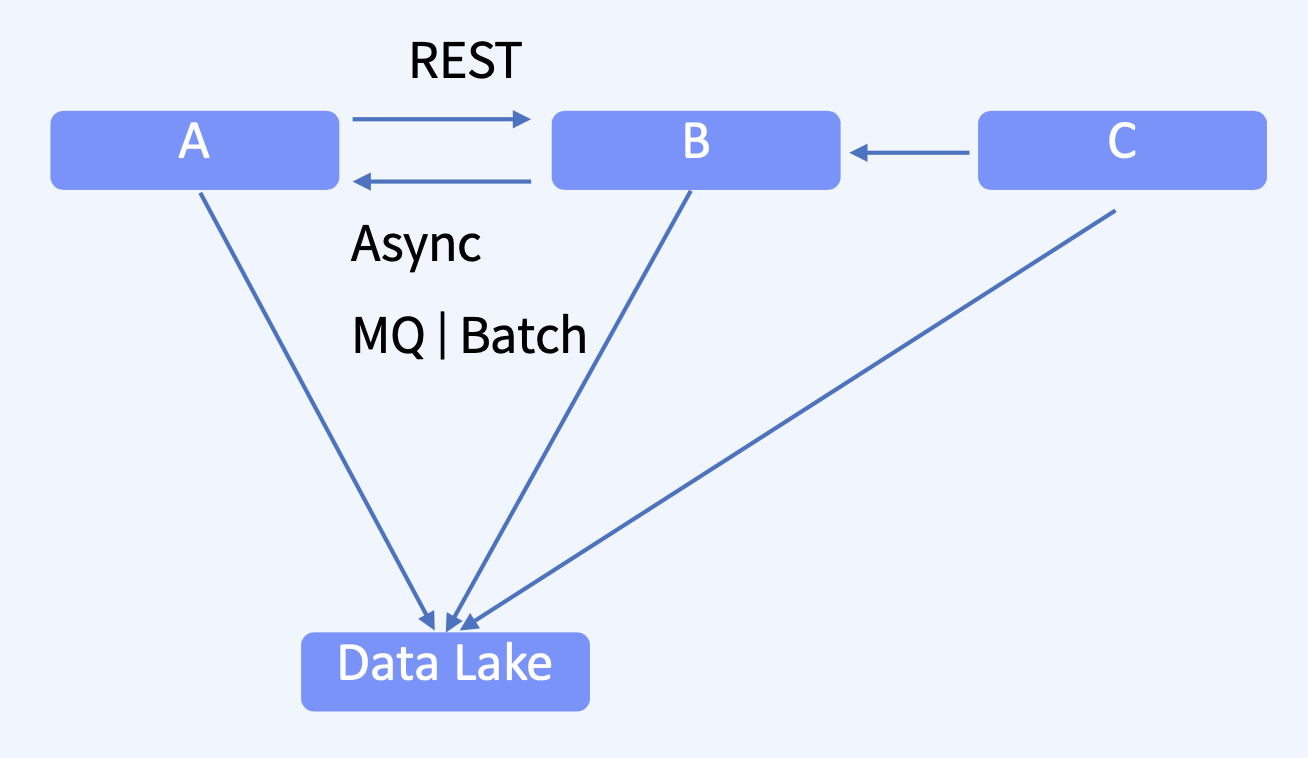

카프카가 나오기 전에는, 시스템 A와 B가 있을 때 일반적으로 데이터를 요청할 때 동기적으로 리퀘스트를 보내어 기다리는 REST API 같은 방법을 사용했다.

간간히 비동기적으로 받아올 때는 MQ나 배치 프로세싱을 사용했다.

각각 A와 B의 데이터가 쌓이는 것을 데이터 레이크로 보내는 파이프라인을 각각 만들어야 했다.

만약 C가 생기게 되면 새로운 A와 B로의 연결고리도 만들고, 데이터 레이크로의 파이프라인을 만들어서 보내야 했다.


# **문제점**

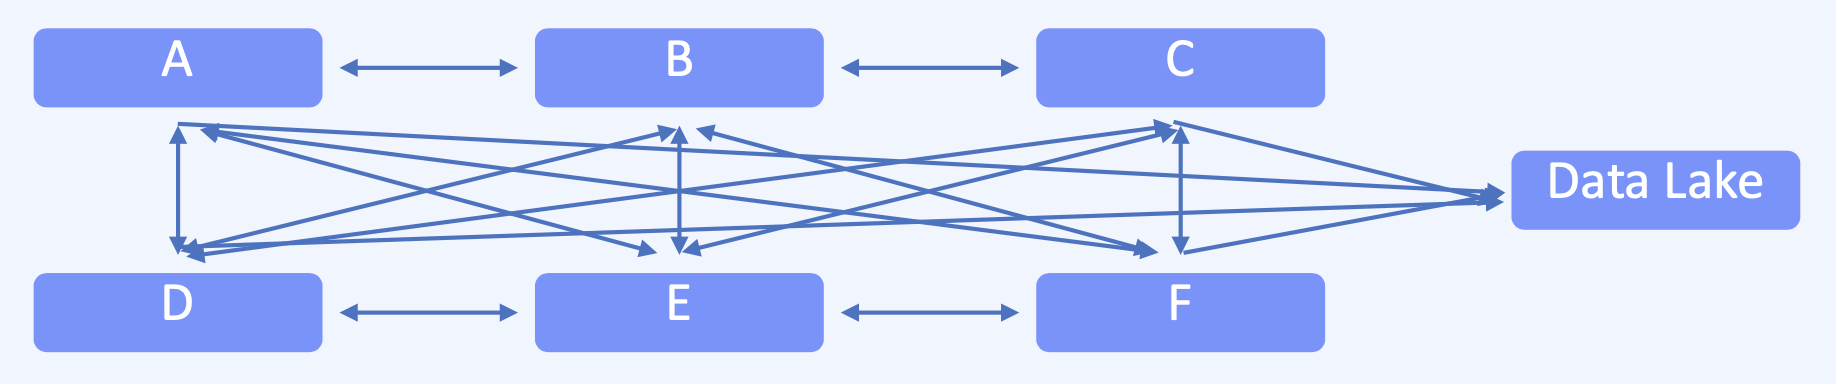

시스템을 더할수록 기하급수적으로 복잡해진다.

여러가지 통신 프로토콜을 지원해야한다.(HTTP, gRPC, TCP, MQ)

데이터 포맷이 다르다.(CSV, JSON, XML)

Point-of-failure가 많다.

연결고리의 신뢰도가 100%가 아니기 때문에 언제든 문제가 터질 수 있는 요소가 된다.

시스템 A, B, C, D, E, F 각각의 신뢰도: 99%

시스템 A, B, C, D, E, F를 묶었을 때의 신뢰도: 99%^6 = 94.1%

각각의 연결고리 어디서 에러가 나고 있는지 모니터링 하기도 힘들다.

# **카프카 소개**

링크드인(LinkedIn)에서 개발되었고 아파치 소프트웨어(Apache Software)로 넘어가 2011년에 오픈소스화 되었다.

애플, 이베이, 우버, 에어비엔비, 넷플릭스 등에서 사용중이다.

분산 스트리밍 플랫폼이다.

소스(Source) 시스템은 카프카로 메세지를 보내고, 데스티네이션(Destination) 시스템은 카프카로부터 메세지를 받는다.

확장성이 있고 장애 허용(fault tolerant)을 하며 성능이 좋다.

# **카프카를 이용한 아키텍쳐**

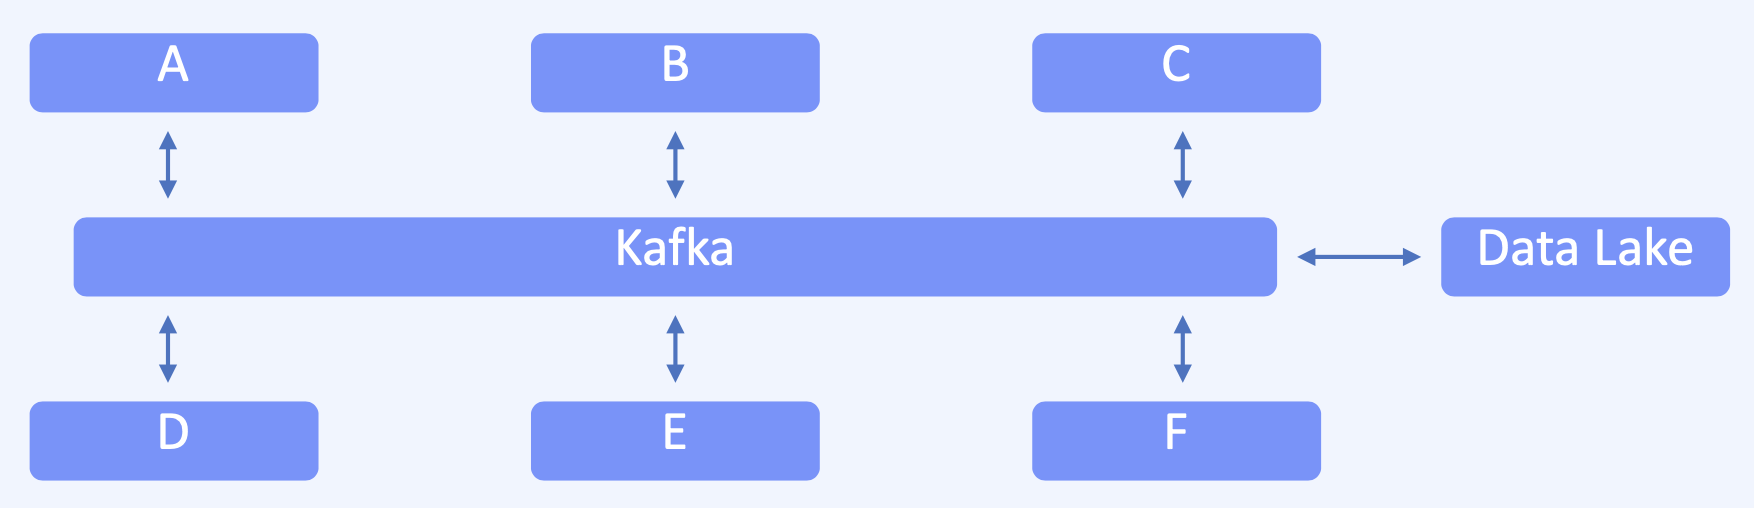

시스템 간 의존성을 간접적으로 만든다.

새 시스템을 더할 때마다 복잡도가 선형적으로 올라간다.

카프카를 이용해 통신 프로토콜을 통합하기 쉽다.

# **카프카의 장점**

확장성: 하루에 1조개의 메세지를 처리할 수 있고, Petabyte의 데이터를 처리할 수 있다.

메세지 처리속도: 2MS이다.

가용성(availability): 클러스터 환경에서 작동한다.

데이터 저장 성능: 분산 처리되고 내구성이 있으며 장애 허용이 가능하다.

# **카프카의 사용 예제**

시스템 간 메세지 큐에 이용할 수 있다.

컨슈머의 처리속도는 낮은데 프로듀서는 데이터를 내보느내는 경우 큐에 쌓아놓고 순차적으로 처리할 수 있다.

로그 수집에도 이용된다.

스트림 프로세싱에도 이용된다.

실시간 알림, 프라이싱
이벤트 드리븐 기능에도 사용이 가능하다.

# **카프카(Kafka)의 구조**

**카프카를 이용한 아키텍쳐**

카프카를 사이에 두고 여러가지 시스템들이 통신하는 아키텍쳐이다.

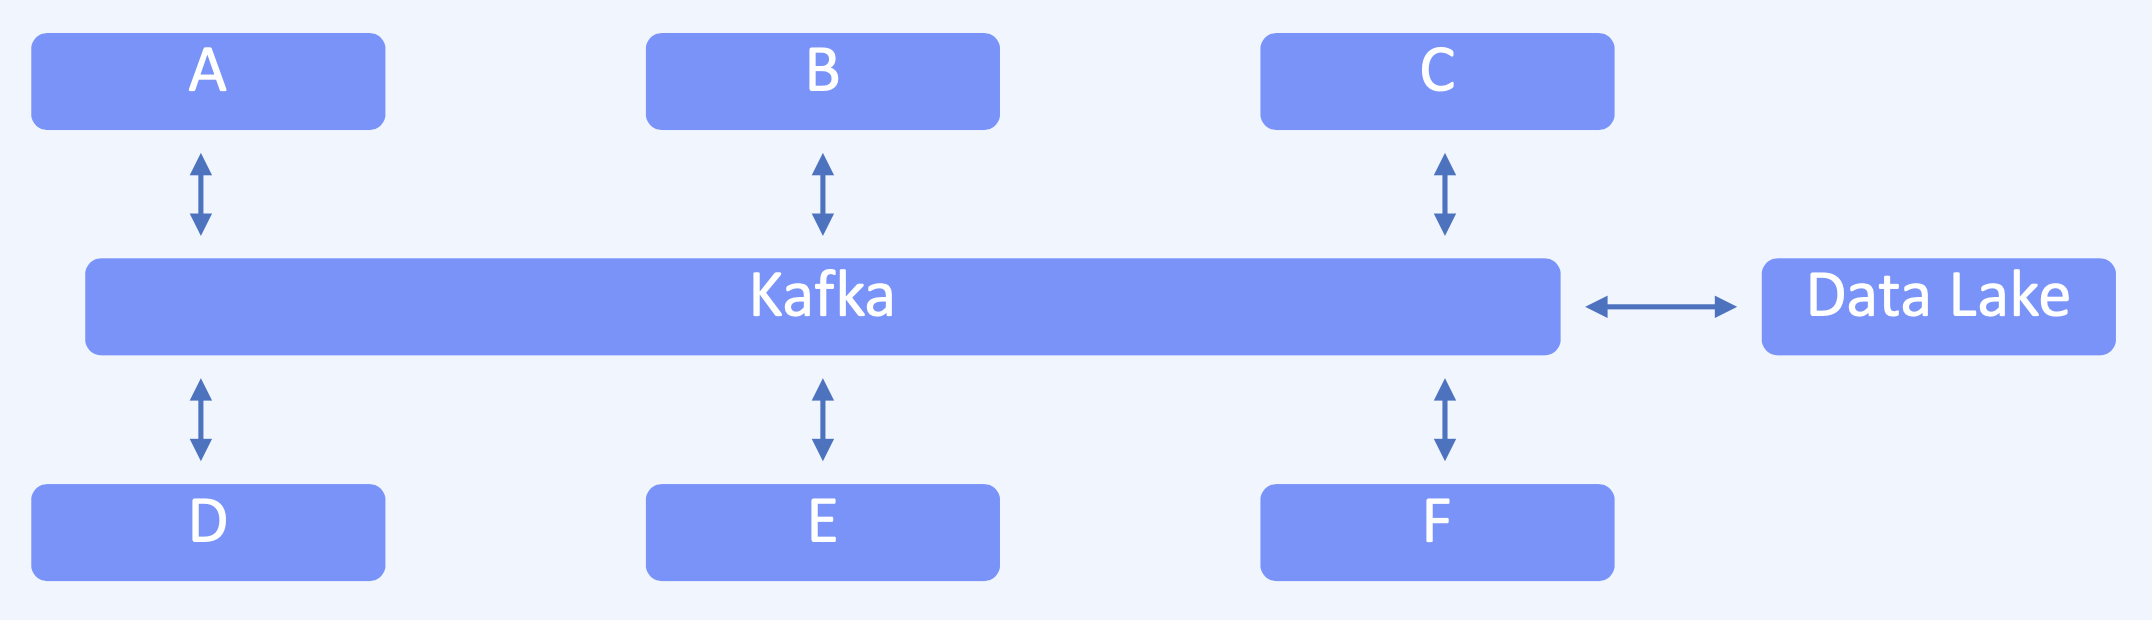

**카프카의 구성**

카프카를 이루고 있는 구성은 아래와 같다.

Topic

KafkaBroker

KafkaProducer

KafkaConsumer

KafkaPartition

KafkaMessage

KafkaOffset

KafkaConsumerGroup

KafkaCluster

Zookeeper


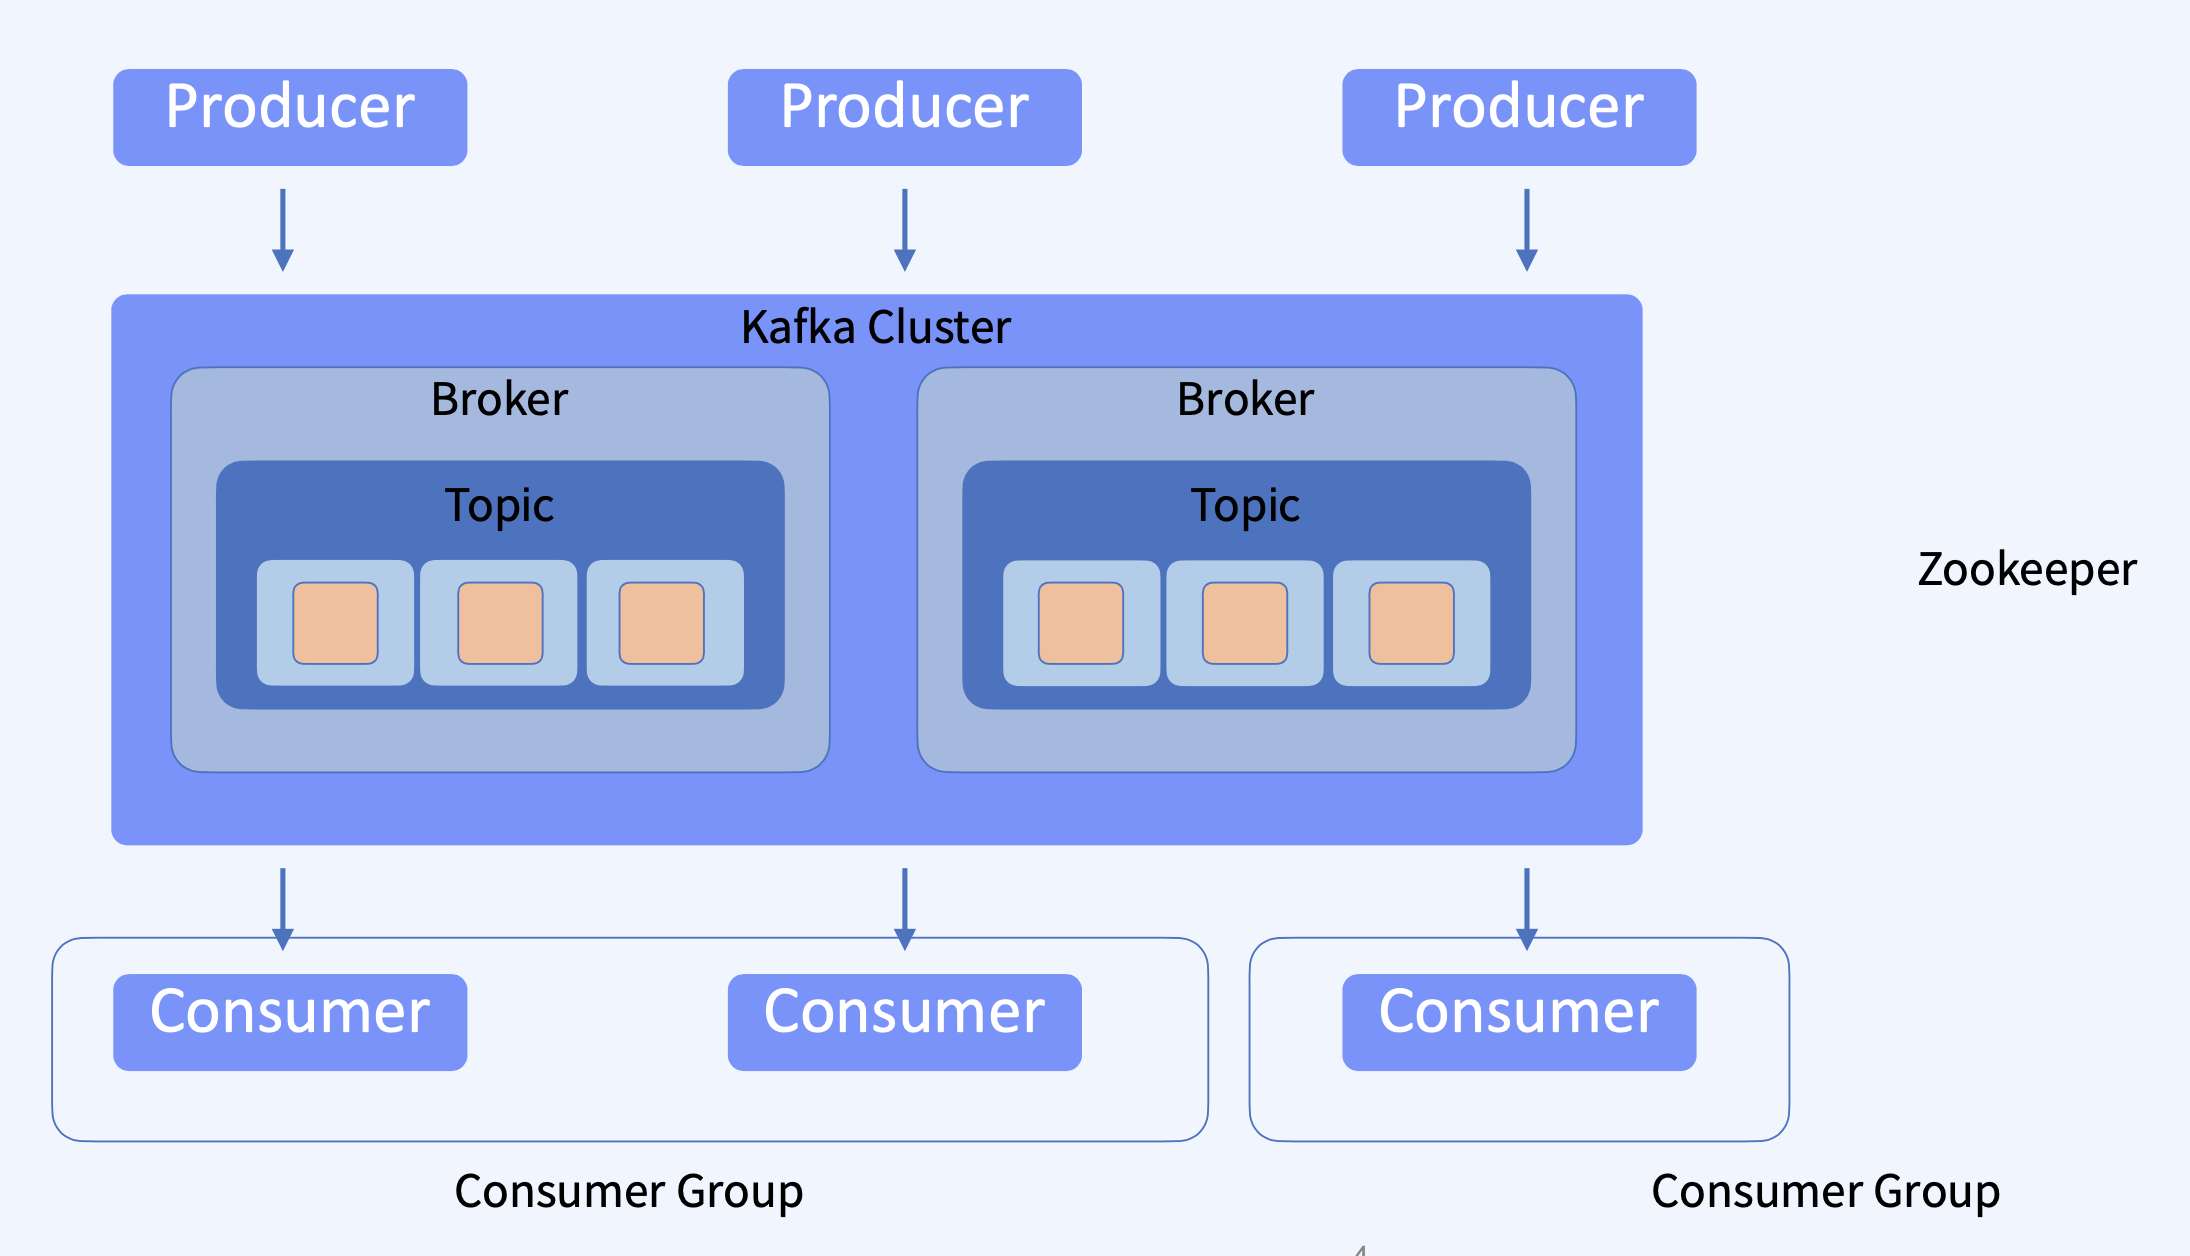

토픽(Topic)은 하나의 채널이나 폴더이다.

데이터가 들어와서 나갈 때 폴더 안에 있으면 개념적으로 분리된다.

프로듀서(Producer)와 컨슈머(Consumer)가 소통하는 하나의 채널이다.

토픽은 브로커(Broker)로 부터 서빙되는데, 브로커는 서버라고도 한다.

브로커는 토픽을 서빙하는 주체이다.

프로듀서와 컨슈머 두 가지가 있는데 각각 메세지를 보내고 받는 역할이다.

마이크로 서비스 아키텍쳐의 어떤 시스템은 프로듀서와 컨슈머 둘 다 갖는 경우가 많다.

카프카 토픽은 파티션(Partition)으로 나뉘며, 실제 디스크에 어떻게 저장되는 지 나누는 기준이 된다.

프로듀서로부터 메세지(Message)가 오면 토픽 안 파티션에 저장된다.

이렇게 보내진 메세지는 오프셋(Offset)이라는 것을 갖는데, 오프셋은 파티션 안에 메세지가 순서대로 정렬된 정렬값 순서를 뜻한다.

첫번째로 온 메세지면 1번이라는 오프셋, 세번째로 온 메세지면 3번이라는 오프셋을 갖게 된다.

컨슈머는 여러개가 모여 그룹(ConsumerGroup)을 이룬다.

카프카는 클러스터(Cluster)를 이룬다.

고가용성이나 확장성을 이루기 위해 브로커가 여러개로 나뉘어 하나의 토픽을 서빙할 수 있다.

브로커에 토픽이 여러 개 생길 수 있다.

하나의 토픽이 여러개의 브로커에 생길 수도 있다.

주키퍼(Zookeeper)는 카프카 클러스터의 여러 요소들의 설정을 정하는 데 사용된다.

메타 데이터를 설정하거나 토픽을 설정하거나 애플리케이션 팩터를 조절한다.

러프하게 알아본 구성을 조금 더 자세하게 알아볼 것이다.

토픽(Topics)

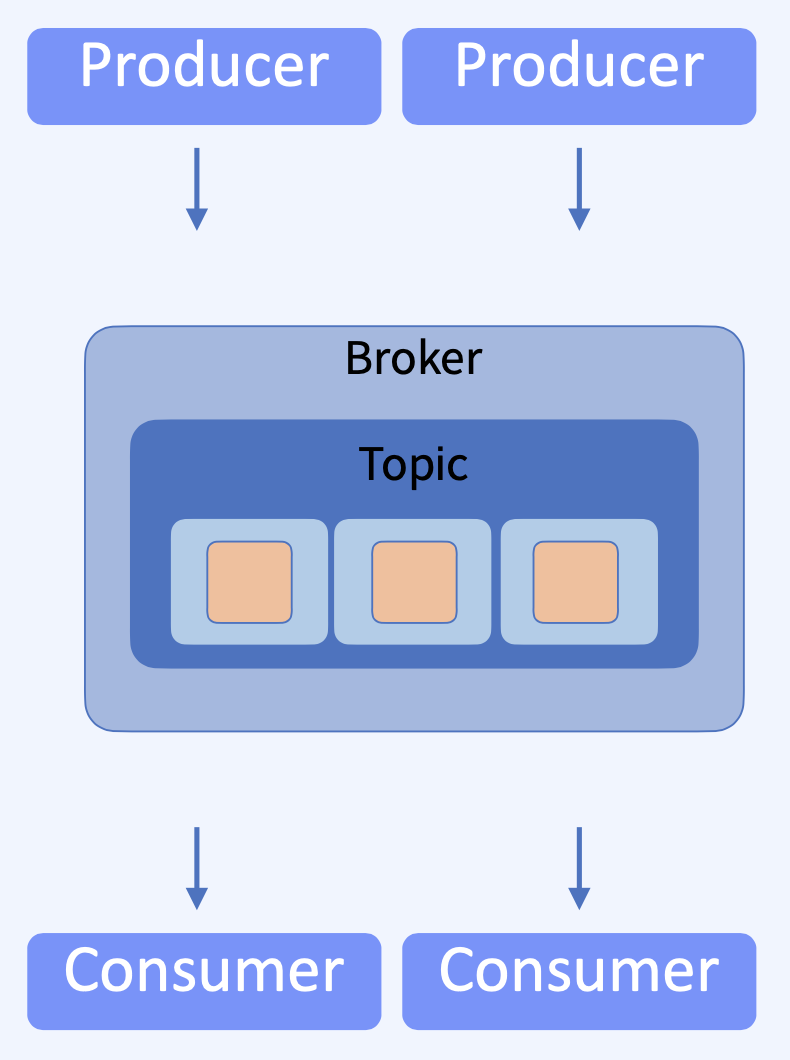

카프카 토픽은 데이터 스트림이 어디에 퍼블리시(Publish) 될 지 정하는 데 쓰인다.

토픽은 파일 시스템의 폴더의 개념과 유사하다.

프로듀서(Producer)는 토픽을 지정하고 메세지를 게시(Post)한다.

컨슈머(Consumer)는 토픽으로부터 메세지를 받아온다.

카프카의 메세지는 디스크에 정렬되어 저장되며, 새로운 메세지가 도착하면 지속적으로 로그에 기록된다.

**파티션(Partitons)**

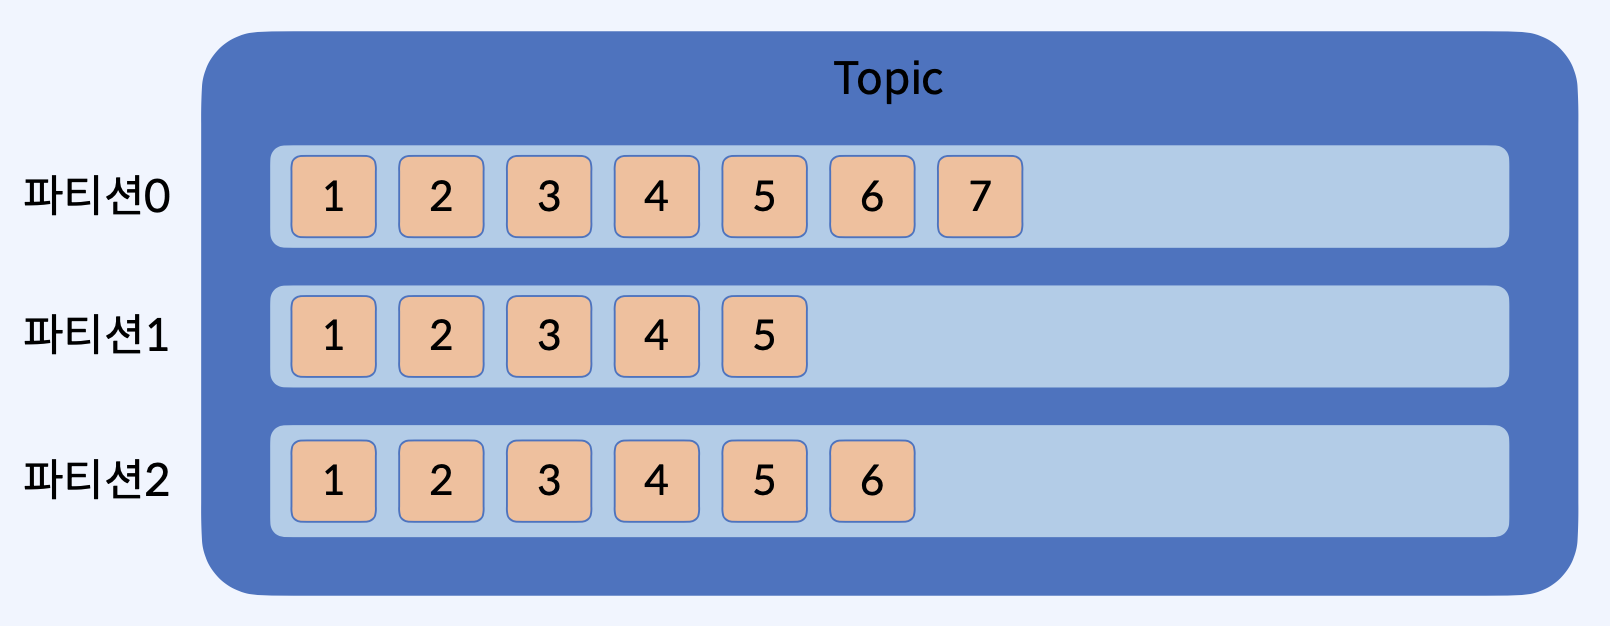

카프카의 토픽은 파티션의 그룹이라고 할 수 있다.

디스크에는 파티션 단위로 저장된다.

파티션마다 커밋 로그가 쌓이게 된다.

파티션에 쌓이는 기록들은 정렬되어있고 불변(Immutable)하다.

파티션의 모든 기록들은 오프셋(Offset)이라는 ID를 부여받는다.

**메세지(Messages)**

카프카의 메세지는 바이트(Byte)의 배열이다.
흔히 단순한 스트링(String), JSON이나 Avro를 사용한다.

카프카 메세지의 크기에는 제한이 없다.

하지만 성능을 위해 작게 유지하는 것을 추천한다.

데이터는 사용자가 지정한 시간만큼 저장한다.(Retention Period)

토픽별로 지정도 가능하다.

컨슈머가 데이터를 받고 나서도 데이터는 저장된다.

사용자가 지정한 시간이 지나면 데이터는 자동으로 삭제된다.